## Feature extractor
We'll do feature extraction based on three aspects, each of which corresponds to an algorithm:
- Shape feature: Hu moments
- Texture feature (related to the spatial arrangement of intensities or colors on a local scale): Local binary patterns (LBP) histogram
- Color: Color histogram (in HSV space)

### Helper function for color and texture features
I noticed that the texture and color feature suffers a lot of from the blank background (although we cropped it). So I guess it'll be better to crop the animal OUT OF the background, then perform color and texture feature extraction on this. For shape feature, the blank background does not affect much.

In [2]:
from utils.edge_detection import extract_object_mask_thresholding, extract_object_mask_canny

### Color histogram (in HSV space)

In [181]:
from algorithms.color_feature_extractor import extract_hsv_histogram_features
edge_detection_kwargs = {'edge_detection_strategy': 'canny',
                         'low_threshold': 0,
                         'high_threshold': 50}
color_features = extract_hsv_histogram_features(r'C:\Users\VICTUS\Desktop\BTL\Hệ_cơ_sở_dữ_liệu_đa_phương_tiện\animal_datasets_no_bg\gettyimages-86082210-612x612.png',
                                                **edge_detection_kwargs)

In [183]:
color_features

array([8.64803612e-01, 4.24516213e-04, 3.12379852e-04, 1.04126615e-04,
       0.00000000e+00, 0.00000000e+00, 8.41022702e-05, 0.00000000e+00,
       0.00000000e+00, 8.99093319e-03, 6.51992811e-03, 2.04648846e-03,
       2.40692683e-03, 1.69005513e-03, 4.00486988e-06, 1.16141229e-04,
       1.60194795e-05, 0.00000000e+00, 1.37206847e-02, 1.21587850e-02,
       1.80619629e-03, 1.74612331e-03, 6.60803518e-04, 0.00000000e+00,
       2.56311672e-04, 0.00000000e+00, 0.00000000e+00, 3.44018335e-03,
       1.27955591e-02, 1.08531979e-03, 4.80584386e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.64930155e-04, 4.62962966e-03, 3.08374991e-04, 1.60194795e-05,
       0.00000000e+00, 0.00000000e+00, 4.00486988e-06, 0.00000000e+00,
       0.00000000e+00, 5.56676940e-04, 2.65923352e-03, 2.32282458e-04,
       3.20389590e-05, 0.00000000e+00, 0.00000000e+00, 4.00487006e-05,
       0.00000000e+00, 0.00000000e+00, 4.48545441e-04, 2.15862482e-03,
      

### Uniform local binary pattern with object mask

In [75]:
### Uniform local binary pattern with object mask
from algorithms.texture_feature_extractor import extract_lbp_features
image_path = r'C:\Users\VICTUS\Desktop\BTL\Hệ_cơ_sở_dữ_liệu_đa_phương_tiện\animal_datasets_no_bg\gettyimages-2169125815-612x612.png'
edge_detection_kwargs = {'edge_detection_strategy': 'canny',
                         'low_threshold': 0,
                         'high_threshold': 50}
texture_features = extract_lbp_features(image_path=image_path, **edge_detection_kwargs)

### Hu Moment

### Create vector database

In [1]:
from utils.datatypes import ImageVectorDatabase
# Create the database
db = ImageVectorDatabase(
    edge_detection_kwargs={'low_threshold': 0, 'high_threshold': 50}
)

# Build the database from a folder
folder_path = r'C:\Users\VICTUS\Desktop\BTL\Hệ_cơ_sở_dữ_liệu_đa_phương_tiện\animal_datasets_no_bg'
# db.build_from_folder(folder_path)


In [2]:
db = ImageVectorDatabase.load_from_json(r'C:\Users\VICTUS\Desktop\BTL\Hệ_cơ_sở_dữ_liệu_đa_phương_tiện\vectordb.json')

Database loaded from C:\Users\VICTUS\Desktop\BTL\Hệ_cơ_sở_dữ_liệu_đa_phương_tiện\vectordb.json with 246 images


In [3]:
# Randomly select a test image from the folder (or use a specific one)
import random
import os

all_images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) 
                if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

# Option 1: Use a random image
query_image = random.choice(all_images)

# Option 2: Use a specific image
# query_image = r'C:\Users\VICTUS\Desktop\BTL\Hệ_cơ_sở_dữ_liệu_đa_phương_tiện\animal_datasets_no_bg\gettyimages-134127309-612x612.jpg'
print(f"Query image: {query_image}")

Query image: C:\Users\VICTUS\Desktop\BTL\Hệ_cơ_sở_dữ_liệu_đa_phương_tiện\animal_datasets_no_bg\gettyimages-1405396491-612x612.png


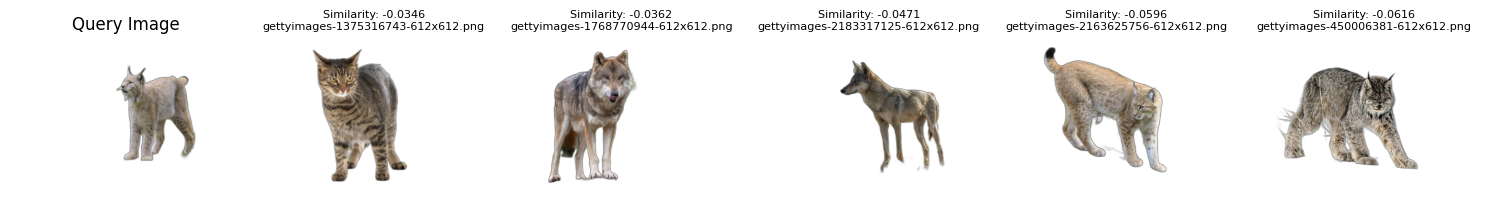

In [5]:
# Visualize results
from utils.similarity_metrics import euclidean_distance, cosine_similarity, manhattan_distance
search_kwargs = {'k': 5,
                 'similarity_metric': euclidean_distance,
                 'include_features': 'both',
                 'feature_bins': {'color': 144, 'texture': 59}}
db.visualize_results(query_image_path=r'C:\Users\VICTUS\Desktop\BTL\Hệ_cơ_sở_dữ_liệu_đa_phương_tiện\animal_datasets_no_bg\gettyimages-2177524094-612x612.png', 
                     **search_kwargs)